In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import hyp2f1, factorial, poch

plt.rcParams.update({'font.size': 24})
plt.rcParams["font.family"] = "serif"
plt.rcParams['mathtext.fontset'] = 'cm'


In [2]:
def F12(a, b, z, ncut):
    
    F = np.array([(poch(a, n)/np.prod(poch(b,n))) * (z**n / factorial(n)) for n in range(ncut)])
    
    return np.sum(F, axis=0)

In [3]:
gamma = 1
t = np.linspace(0, 10, 1000)
n = 1
ncut = 30

In [4]:
def Pnt_general(gamma, n, t):
    
    # exact solution of example b using hypergeometric functions 
    gt = gamma * t
    
    A = np.exp(-gt)
    B = (gt)**(2*n) / factorial(2*n)
    C = 2 * gt * (-1)**n / ((2*n - 1)*np.pi)
    D = F12(0.5-n, [3/2, 3/2 - n], -(gt)**2/4, ncut)
    
    return A*(B - C*D)
    

def Pnt_saddle(gamma, n, t):
    
    # Approximate solution of example b using saddle point approximation
    gt = gamma * t
    
    A = (np.exp(2*n-gt)/np.sqrt(n*np.pi))
    B = (gt / (2*n))**(2*n)
    
    # Normalise function too 
    
    C = A * B
    
    return C
    
    

In [5]:
gamma = 1
t = np.linspace(0, 20, 1000)
dt = t[1]-t[0]
n = 3

P1tg = Pnt_general(gamma, 1, t)
P1ts = Pnt_saddle(gamma, 1, t)

P2tg = Pnt_general(gamma, 2, t)
P2ts = Pnt_saddle(gamma, 2, t)

P5tg = Pnt_general(gamma, 6, t)
P5ts = Pnt_saddle(gamma, 6, t)



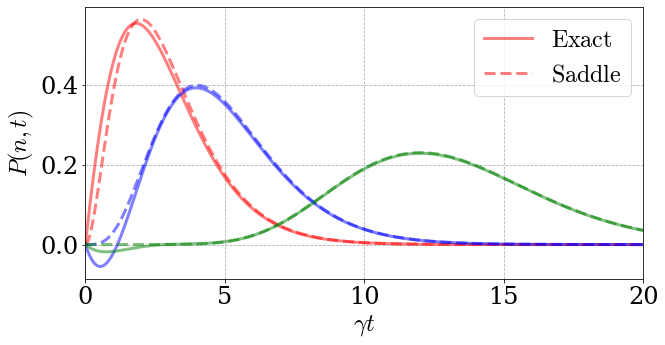

In [8]:
fig = plt.figure(figsize=(10, 5))

plt.plot(t, P1tg, color='r', linewidth=3, label=r'${\rm Exact}$', alpha=0.5)
plt.plot(t, P1ts, color='r', linewidth=3, linestyle='--', label=r'${\rm Saddle}$', alpha=0.5)

plt.plot(t, P2tg, color='b', linewidth=3, alpha=0.5)
plt.plot(t, P2ts, color='b', linewidth=3, linestyle='--', alpha=0.5)

plt.plot(t, P5tg, color='g', linewidth=3, alpha=0.5)
plt.plot(t, P5ts, color='g', linewidth=3, linestyle='--', alpha=0.5)

plt.xlabel(r'$\gamma t$')
plt.ylabel(r'$P(n,t)$')

plt.xlim([t[0], t[-1]])
plt.grid(True, linestyle='--')
plt.legend()

plt.show()

fig.savefig('saddle.png', dpi=200, bbox_inches='tight')

In [173]:
np.sum(P1tg*dt)

2.1442583038972787